In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
Outlier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/h2oai/app-consumer-loan/refs/heads/master/data/loan.csv")

In [3]:
df

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified


In [7]:
df.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


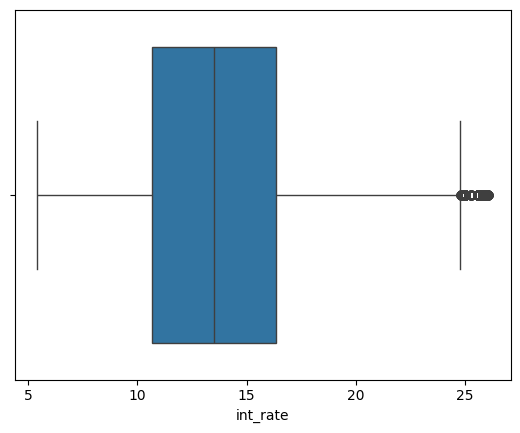

In [7]:
sns.boxplot(x = "int_rate", data = df)
plt.show()

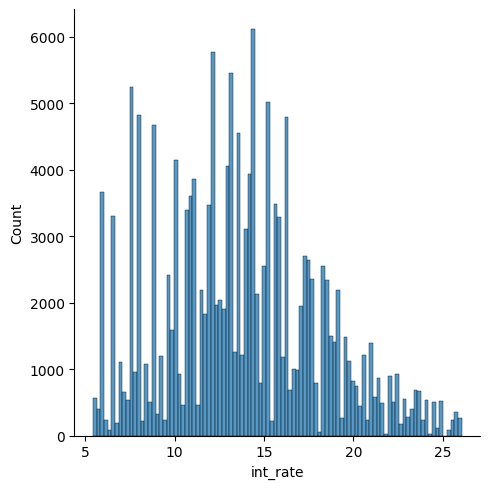

In [10]:
sns.displot(df["int_rate"])
plt.show()

In [11]:
l = [5,6,7,4,6,7,5]
sum(l)/len(l)

5.714285714285714

In [ ]:
Outlier Removal Using IQR

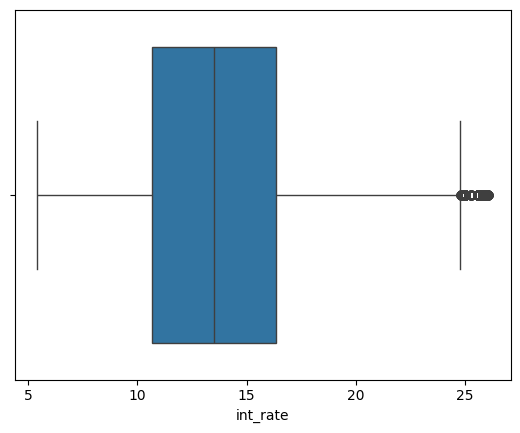

In [12]:
sns.boxplot(x = "int_rate", data = df)
plt.show()

In [13]:
df.shape

(163987, 15)

In [8]:
q1 = df['int_rate'].quantile(0.25)
q3 = df['int_rate'].quantile(0.75)
q1
q3

np.float64(16.32)

In [9]:
IQR = q3 - q1

In [10]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range , max_range

(np.float64(2.1450000000000014), np.float64(24.825))

In [12]:
df[df['int_rate']<=max_range]

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified


In [ ]:
outlier Removal Using Z Score

In [4]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

In [5]:
df.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


<Axes: xlabel='loan_amnt'>

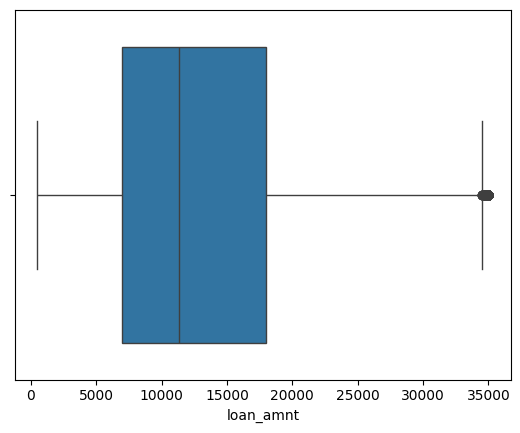

In [7]:
sns.boxplot(x = 'loan_amnt' , data = df)

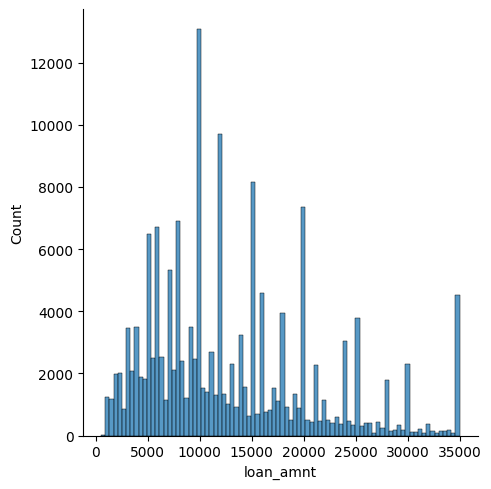

In [9]:
sns.displot(df['loan_amnt'])

In [11]:
min_range = df['loan_amnt'].mean() - (3*df['loan_amnt'].std())
max_range = df['loan_amnt'].mean() - (3*df['loan_amnt'].std())
min_range, max_range

(np.float64(-10906.499424747617), np.float64(-10906.499424747617))

In [14]:
new_data = df[df['loan_amnt']<=max_range]

In [16]:
z_score = (df['loan_amnt'] - df['loan_amnt'].mean())/(df['loan_amnt'].std())

In [18]:
z_score>3

0         False
1         False
2         False
3         False
4         False
          ...  
163982    False
163983    False
163984    False
163985    False
163986    False
Name: loan_amnt, Length: 163987, dtype: bool

In [19]:
df['z_score'] = z_score

In [21]:
df[df['z_score']<3]

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status,z_score
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified,-1.010085
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified,-1.322837
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified,-1.335347
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified,-0.384581
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified,-1.010085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified,0.240923
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified,0.866427
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified,-0.031171
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified,1.823448


In [ ]:
Feature Scaling (Standardization)

In [22]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
z_score                     0
dtype: int64

In [24]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace = True)

C:\Users\Ali Shah\AppData\Local\Temp\ipykernel_9208\3071935217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_inc'].fillna(df['annual_inc'].mean(), inplace = True)


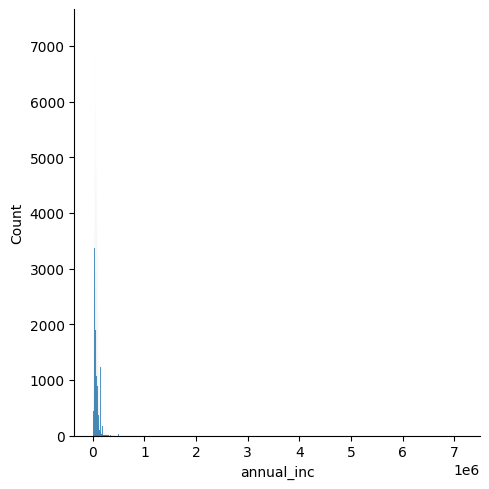

In [28]:
sns.displot(df['annual_inc'])
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler()
ss.fit(df[['annual_inc']])

StandardScaler()

In [32]:
ss.transform(df[['annual_inc']])

array([[-0.8111674 ],
       [-0.70959302],
       [-1.01005003],
       ...,
       [-0.57416052],
       [-0.20172114],
       [-0.14961348]], shape=(163987, 1))

In [33]:
df['annual_inc'] = pd.DataFrame(ss.transform(df[['annual_inc']]),columns=['x'])

In [34]:
df.head(3)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status,z_score
0,5000,36 months,10.65,10.0,RENT,-0.811167,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified,-1.010085
1,2500,60 months,15.27,0.0,RENT,-0.709593,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified,-1.322837
2,2400,36 months,15.96,10.0,RENT,-1.010050,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified,-1.335347


In [35]:
df.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,z_score
count,163987.000000,163987.000000,158183.000000,1.639870e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000,1.639870e+05
mean,13074.169141,13.715904,5.684353,-1.654634e-16,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274,-6.160331e-17
std,7993.556189,4.391940,3.610664,1.000003e+00,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733,1.000000e+00
min,500.000000,5.420000,0.000000,-1.185367e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.573038e+00
25%,7000.000000,10.650000,2.000000,-4.556571e-01,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000,-7.598832e-01
50%,11325.000000,13.490000,6.000000,-1.847921e-01,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000,-2.188224e-01
75%,18000.000000,16.320000,10.000000,2.215054e-01,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000,6.162252e-01
max,35000.000000,26.060000,10.000000,1.196861e+02,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000,2.742938e+00


In [ ]:
Feature Scaling (Normalization)

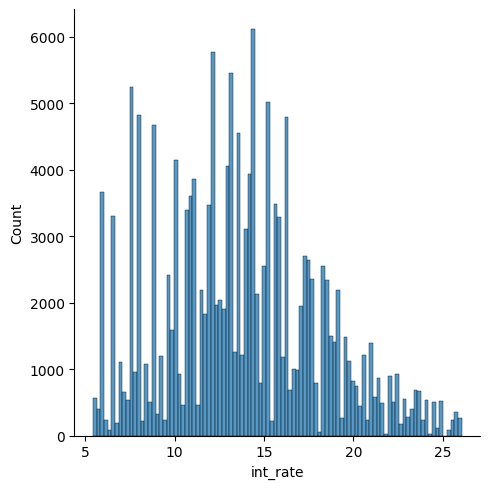

In [37]:
sns.displot(df['int_rate'])

In [39]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
ms.fit(df['int_rate'])

In [41]:
ms = MinMaxScaler()
ms.fit(df[['int_rate']])

MinMaxScaler()

In [43]:
df['int_rate'] = ms.transform(df[['int_rate']])

In [44]:
df.head(3)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status,z_score
0,5000,36 months,0.253391,10.0,RENT,-0.811167,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified,-1.010085
1,2500,60 months,0.477229,0.0,RENT,-0.709593,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified,-1.322837
2,2400,36 months,0.510659,10.0,RENT,-1.010050,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified,-1.335347


KeyError: 'int_min'

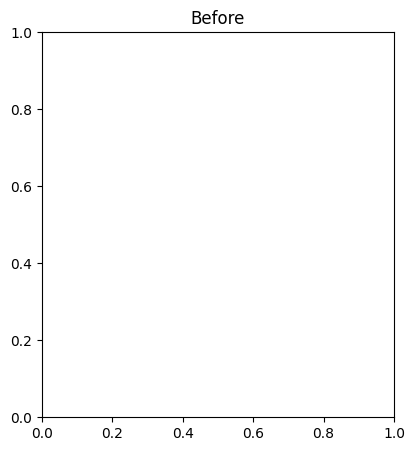

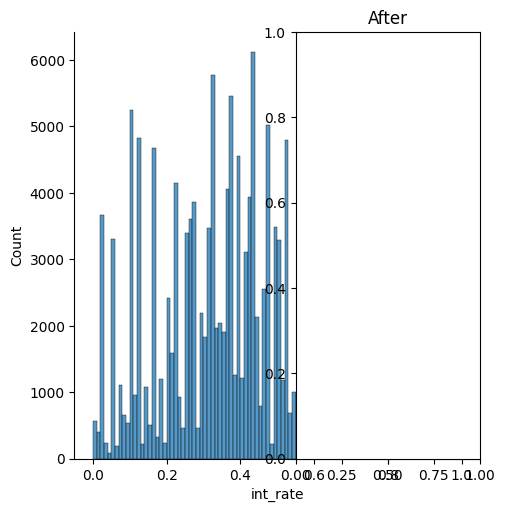

In [45]:
plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
plt.title('Before')
sns.displot(df['int_rate'])

plt.subplot(1,2,2)
plt.title('After')
sns.displot(df['int_min'])
plt.show()

In [ ]:
Handling Duplicate Data

In [65]:
data = {"name":["a","b","c","d","a","c"], "eng":[8,7,5,8,8,5],"hindi":[2,3,4,5,2,6]}

In [66]:
df = pd.DataFrame(data)
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,5,6


In [67]:
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,5,6


In [69]:
df.drop_duplicates(inplace = True)

In [70]:
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
5,c,5,6


In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/h2oai/app-consumer-loan/refs/heads/master/data/loan.csv")
df1

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified


In [73]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
163982    False
163983    False
163984    False
163985    False
163986    False
Length: 163987, dtype: bool

In [74]:
df1.shape

(163987, 15)

In [75]:
df1.drop_duplicates(inplace = True)

In [76]:
df1.shape

(163987, 15)

In [ ]:
Replace and (Data Type Change)

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [78]:
df1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

In [80]:
df1['total_acc'].value_counts()

total_acc
20.0     5970
21.0     5947
22.0     5824
23.0     5816
17.0     5800
         ... 
93.0        1
118.0       1
94.0        1
102.0       1
95.0        1
Name: count, Length: 96, dtype: int64

In [81]:
df1['total_acc'].fillna(df1['total_acc'].mode()[0], inplace = True)

In [82]:
df1['total_acc'].replace('20.0','-20.0')

0          9.0
1          4.0
2         10.0
3         37.0
4         12.0
          ... 
163982    34.0
163983    18.0
163984    24.0
163985    20.0
163986    28.0
Name: total_acc, Length: 163987, dtype: float64

In [83]:
df1['total_acc'] = df1['total_acc'].astype('int64')

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163987 non-null  int64  
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [ ]:
Function Transformer

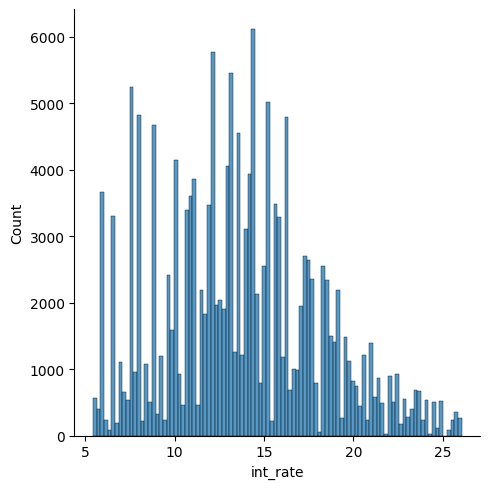

In [93]:
sns.displot(df1['int_rate'])

In [87]:
q1 = df1['int_rate'].quantile(0.25)
q3 = df1['int_rate'].quantile(0.75)
iqr = q3-q1

In [88]:
min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)
min_r , max_r

(np.float64(2.1450000000000014), np.float64(24.825))

In [92]:
df1[df1["int_rate"]<=max_r]

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12,0,7.0,verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34,0,20.0,not verified
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18,0,22.0,verified
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24,0,9.0,not verified
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20,0,6.0,verified


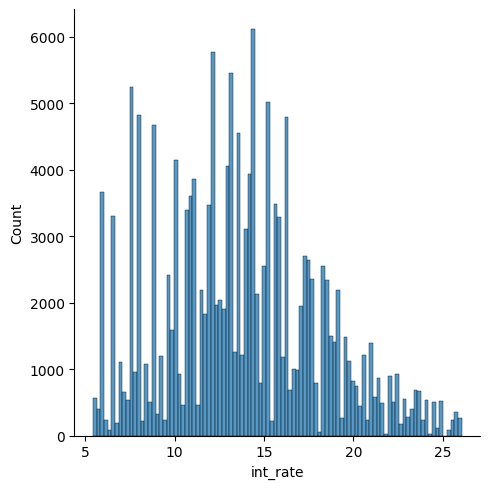

In [94]:
sns.displot(df1['int_rate'])
plt.show()

In [95]:
from sklearn.preprocessing import FunctionTransformer

In [96]:
ft = FunctionTransformer(func = np.log1p)

In [97]:
ft.fit(df1[['int_rate']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [98]:
df1['int_rate_tf'] = ft.transform(df1[['int_rate']])

,int_rate
0,2.455306
1,2.789323
2,2.830858
3,2.673459
4,2.186051
...,...
163982,2.594508
163983,2.771964
163984,2.898119
163985,3.135059


KeyError: 'int_rate_tf'

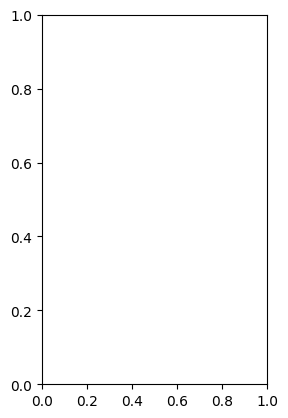

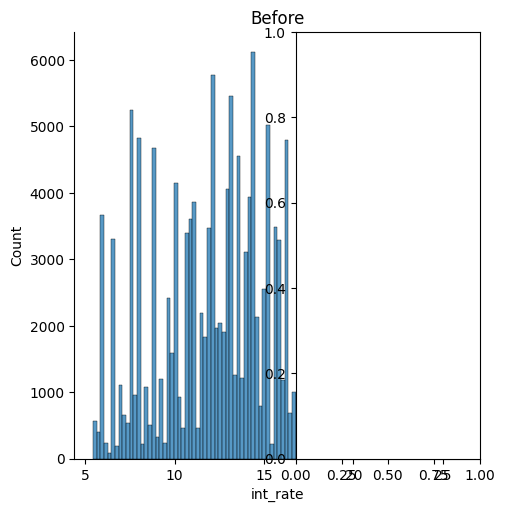

In [101]:

plt.subplot(1,2,2)
sns.displot(df1['int_rate'])
plt.title('Before')

plt.subplot(1,2,2)
sns.displot(df1['int_rate_tf'])
plt.title('After')
plt.show()

In [ ]:
Feature Selection Techniques

In [8]:
import pandas as pd
#from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector

In [10]:
dataset = pd.read_csv("https://raw.githubusercontent.com/sachin365123/CSV-files-for-Data-Science-and-Machine-Learning/refs/heads/main/DimCity.csv")
dataset

,City Key,City,State Province,Country,Sales Territory,Location,Latest Recorded Population
0,18,Carson,California,United States,Far West,0xE6100000010C345A58816BEA4040AC1BEF8E0C925DC0,91714
1,19,Carson,Washington,United States,Far West,0xE6100000010C8B98C8BBD9DC4640CDFBA47F6E745EC0,2279
2,22,Carson City,Nevada,United States,Far West,0xE6100000010C8D919158F7944340B67526231DF15DC0,55274
3,27,Cartago,California,United States,Far West,0xE6100000010C168156050F294240936FB6B9B1815DC0,92
4,36,El Centro,California,United States,Far West,0xE6100000010C4C37894160654040E43DBD0809E45CC0,42598
...,...,...,...,...,...,...,...
13023,116024,Yreka,California,United States,Far West,0xE6100000010CF4AE303322DE444016116A2B9BA85EC0,7765
13024,116025,Yuba City,California,United States,Far West,0xE6100000010C3326B330FA91434026A36F777B675EC0,64925
13025,116026,Yucaipa,California,United States,Far West,0xE6100000010CFCA9F1D24D0441408B19E1EDC1425DC0,51367
13026,116027,Yucca Valley,California,United States,Far West,0xE6100000010C984572439D0E4140F14BFDBCA91B5DC0,20700


In [11]:
dataset.head(3)

,City Key,City,State Province,Country,Sales Territory,Location,Latest Recorded Population
0,18,Carson,California,United States,Far West,0xE6100000010C345A58816BEA4040AC1BEF8E0C925DC0,91714
1,19,Carson,Washington,United States,Far West,0xE6100000010C8B98C8BBD9DC4640CDFBA47F6E745EC0,2279
2,22,Carson City,Nevada,United States,Far West,0xE6100000010C8D919158F7944340B67526231DF15DC0,55274


In [14]:
x = dataset.iloc[:,:-1]
y = dataset["Country"]

In [17]:
x.shape

(13028, 6)